In [174]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


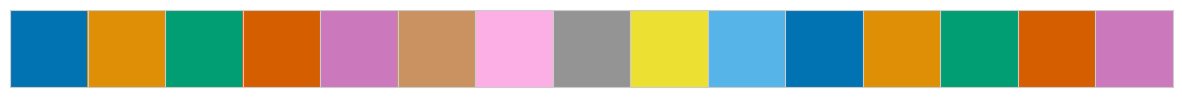

In [175]:
import sys
sys.path.insert(0, '..//src/')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import main
from pathlib import Path


sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "pdf"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
sns.palplot(sns.color_palette())

In [176]:
PATH_ONEDRIVE = Path(r'D:\Profile data Cardiff\OneDrive - Cardiff University')
path_saving_results = PATH_ONEDRIVE / r'04 - Projects\25 - Geothermal district heating\04 - Data\viable_lsoas'
path_scotland_results = PATH_ONEDRIVE / r'04 - Projects\22 - Heat demand scotland\data'
# path_ukerc_england_wales_df = Path(r"C:\Users\sceac10\Cardiff University\National Grid Project - Documents\General\Paper\data for UKERC")
path_england_wales_df = PATH_ONEDRIVE / r'04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data'
ukerc_save_data =PATH_ONEDRIVE / r'04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\UKERC\01 - Thermal_Characteristics'

path_scotland_la_region_lookup = PATH_ONEDRIVE / r'04 - Projects\00 - Final data\Geo_lookup_tables\Scotland_LAregionlookup.csv'

path_gb_data = PATH_ONEDRIVE / r'04 - Projects\00 - Final data\Annual_demand'

In [177]:
# thermal characteristics LSOA data
lookup_geolocation_df = pd.read_csv(ukerc_save_data/f"Thermal_characteristics_afterEE.csv", index_col=0)
lookup_geolocation_df.head()


,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC
Index,,,,,,,,,,,,
0,E01000001,City of London,London,flat,oil boiler,7743.573923,0.190661,12.0,8115.289346,77.435739,low,-2.0
1,E01000001,City of London,London,semi-detached,gas boiler,9757.884426,0.262593,2.0,11176.994057,97.578844,low,-2.0
2,E01000001,City of London,London,terraced,gas boiler,17584.164375,0.436325,1.0,18571.754902,175.841644,low,-2.0
3,E01000001,City of London,London,terraced,resistance heating,6526.000000,0.062456,10.0,2658.375704,65.260000,low,-2.0
4,E01000001,City of London,London,flat,gas boiler,5785.363636,0.114664,95.0,4880.555556,57.853636,low,-2.0


In [178]:

lookup_lsoa_LA = dict(zip(lookup_geolocation_df['LSOA_code'].values, lookup_geolocation_df['Local Authority'].values))
lookup_lsoa_Region = dict(zip(lookup_geolocation_df['LSOA_code'].values, lookup_geolocation_df['Region'].values))


In [179]:
scenario = 'before'
england_wales_df = pd.read_csv(path_england_wales_df/f"LSOAs_in_England_Wales_{scenario}_EE_heat_demand.csv")
england_wales_df.columns = [x.lower() for x in england_wales_df.columns]
england_wales_df.head()

,lsoa11cd,n_households 2011,rurality,msoa11cd,lad11cd,local authority,detached no central heating 2011,number of detached gas boiler in 2011,number of detached resistance heating in 2011,number of detached oil boiler in 2011,...,epc efficiency d to d,epc efficiency e to d,epc efficiency f to d,epc efficiency g to d,epc efficiency e to e,epc efficiency f to e,epc efficiency g to e,epc efficiency f to f,epc efficiency g to f,epc efficiency g to g
0,E01000001,876,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,0.0,...,-0.022346,-0.020512,-0.015392,-0.012960,-0.020716,-0.016850,-0.014638,-0.021551,-0.017881,NaN
1,E01000002,830,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,0.0,...,-0.022346,-0.021067,-0.015392,-0.012960,-0.020716,-0.016850,-0.014638,-0.021551,-0.017881,NaN
2,E01000003,817,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,0.0,...,-0.020728,-0.020100,-0.015392,-0.012960,-0.020716,-0.016850,-0.014638,-0.021551,-0.017881,NaN
3,E01000005,467,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,1.0,0.0,0.0,...,-0.022384,-0.020857,-0.015392,-0.012960,-0.020716,-0.016850,-0.014638,-0.021551,-0.019133,NaN
4,E01000006,543,Rurality_Urban >10K,E02000017,E09000002,Barking and Dagenham,2.0,26.0,1.0,0.0,...,-0.024497,-0.015810,-0.014882,-0.012923,-0.015369,-0.016717,-0.014027,-0.018572,-0.015320,-0.021505


In [180]:
england_wales_df.columns = [x+" (m2)" if "average floor area" in x else x for x in england_wales_df.columns ]
for x in england_wales_df.columns:
  print(x)

lsoa11cd
n_households 2011
rurality
msoa11cd
lad11cd
local authority
detached no central heating 2011
number of detached gas boiler in 2011
number of detached resistance heating in 2011
number of detached oil boiler in 2011
number of detached biomass boiler in 2011
semi-detached no central heating 2011
number of semi-detached gas boiler in 2011
number of semi-detached resistance heating in 2011
number of semi-detached oil boiler in 2011
number of semi-detached biomass boiler in 2011
terraced no central heating 2011
number of terraced gas boiler in 2011
number of terraced resistance heating in 2011
number of terraced oil boiler in 2011
number of terraced biomass boiler in 2011
flat no central heating 2011
number of flat gas boiler in 2011
number of flat resistance heating in 2011
number of flat oil boiler in 2011
number of flat biomass boiler in 2011
area (km2)
road length (m)
total number of domestic electricity meters 2018
n_households 2018
number of detached gas boiler in 2018
number

In [181]:
scotland_df = pd.read_csv(path_scotland_results/"full_scotland_results.csv", index_col=0)
scotland_df.columns = [x.lower() for x in scotland_df.columns]
scotland_df.columns = [c.replace('resistance', 'resistance heating') for c in scotland_df.columns]
scotland_df.columns = [c.replace('solid fuel boiler', 'biomass boiler') for c in scotland_df.columns]
scotland_df.head()

,lsoa11cd,msoa11cd,ladcd,ladnm,average heat demand before energy efficiency measures for detached gas boiler (kwh),average heat demand before energy efficiency measures for detached oil boiler (kwh),average heat demand before energy efficiency measures for detached resistance heating (kwh),average heat demand before energy efficiency measures for detached biomass boiler (kwh),average heat demand before energy efficiency measures for flat gas boiler (kwh),average heat demand before energy efficiency measures for flat oil boiler (kwh),...,total heat demand before energy efficiency measures of flat resistance heating in 2018 (kwh),total heat demand after energy efficiency measures of flat resistance heating in 2018 (kwh),total heat demand before energy efficiency measures of flat gas boiler in 2018 (kwh),total heat demand after energy efficiency measures of flat gas boiler in 2018 (kwh),total heat demand before energy efficiency measures of flat biomass boiler in 2018 (kwh),total heat demand after energy efficiency measures of flat biomass boiler in 2018 (kwh),total heat demand before energy efficiency measures of flat oil boiler in 2018 (kwh),total heat demand after energy efficiency measures of flat oil boiler in 2018 (kwh),road length (m),area (km2)
3629,S01006506,S02001236,S12000033,aberdeen city,21438.468750,19968.000000,14088.5,31384.75,7846.394737,15683.666667,...,524564.090909,357768.209080,1.498661e+06,1.212025e+06,26119.0,14889.283257,0.000000,0.000000,7144.704905,4.388802
853,S01006507,S02001236,S12000033,aberdeen city,21655.277778,21845.000000,10184.0,31384.75,9522.961538,15683.666667,...,253269.000000,151087.556211,4.951940e+05,3.861348e+05,26119.0,14889.283257,0.000000,0.000000,3562.459752,0.221747
5987,S01006508,S02001236,S12000033,aberdeen city,22849.600000,27226.631579,13177.0,31384.75,7988.817391,15683.666667,...,405157.388889,271352.684156,1.318155e+06,1.118214e+06,0.0,0.000000,0.000000,0.000000,2689.130582,0.270195
839,S01006509,S02001236,S12000033,aberdeen city,20255.000000,27226.631579,12411.0,31384.75,8299.315789,15683.666667,...,241525.769231,143893.714008,4.730610e+05,3.747631e+05,0.0,0.000000,0.000000,0.000000,2029.960587,0.096254
5159,S01006510,S02001236,S12000033,aberdeen city,22805.769231,27226.631579,14088.5,31384.75,7985.275000,15683.666667,...,57800.000000,23745.007514,6.947189e+05,5.595759e+05,0.0,0.000000,15683.666667,9060.830466,2312.863906,0.180077


In [182]:
lookup_lsoa_LA_scotland = dict(scotland_df[['lsoa11cd', 'ladnm']].values)

lookup_la_region_scotland = pd.read_csv(path_scotland_la_region_lookup, index_col=0)
lookup_la_region_scotland = dict(lookup_la_region_scotland.values)

In [183]:
gb_df = pd.concat([scotland_df, england_wales_df], axis=0)#.dropna(axis=1)

In [184]:
cols_to_keep = ['lsoa11cd', 'msoa11cd', 'road length (m)', 'area (km2)']
cols_to_keep = cols_to_keep + [x for x in gb_df.columns if f"average heat demand {scenario} energy efficiency measures for" in x]
cols_to_keep = cols_to_keep + [x for x in gb_df.columns if "average floor area" in x]
cols_to_keep = cols_to_keep + [x for x in gb_df.columns if "number of" in x and 'in 2018' in x and 'total' not in x]
cols_to_keep = cols_to_keep + [x for x in gb_df.columns if "number of" in x and 'in 2011' in x and 'total' not in x]
cols_to_keep

['lsoa11cd',
 'msoa11cd',
 'road length (m)',
 'area (km2)',
 'average heat demand before energy efficiency measures for detached gas boiler (kwh)',
 'average heat demand before energy efficiency measures for detached oil boiler (kwh)',
 'average heat demand before energy efficiency measures for detached resistance heating (kwh)',
 'average heat demand before energy efficiency measures for detached biomass boiler (kwh)',
 'average heat demand before energy efficiency measures for flat gas boiler (kwh)',
 'average heat demand before energy efficiency measures for flat oil boiler (kwh)',
 'average heat demand before energy efficiency measures for flat resistance heating (kwh)',
 'average heat demand before energy efficiency measures for flat biomass boiler (kwh)',
 'average heat demand before energy efficiency measures for semi-detached gas boiler (kwh)',
 'average heat demand before energy efficiency measures for semi-detached oil boiler (kwh)',
 'average heat demand before energy effic

In [185]:
gb_df = gb_df[cols_to_keep]
gb_df['Region'] = gb_df['lsoa11cd'].map(lookup_lsoa_Region)
gb_df['Local Authority'] = gb_df['lsoa11cd'].map(lookup_lsoa_LA)
gb_df['Local Authority'] = gb_df['Local Authority'].fillna(gb_df['lsoa11cd'].map(lookup_lsoa_LA_scotland))
gb_df['Region'] = gb_df['Region'].fillna(gb_df['Local Authority'].map(lookup_la_region_scotland))
gb_df.head()

,lsoa11cd,msoa11cd,road length (m),area (km2),average heat demand before energy efficiency measures for detached gas boiler (kwh),average heat demand before energy efficiency measures for detached oil boiler (kwh),average heat demand before energy efficiency measures for detached resistance heating (kwh),average heat demand before energy efficiency measures for detached biomass boiler (kwh),average heat demand before energy efficiency measures for flat gas boiler (kwh),average heat demand before energy efficiency measures for flat oil boiler (kwh),...,number of semi-detached gas boiler in 2011,number of semi-detached oil boiler in 2011,number of semi-detached resistance heating in 2011,number of semi-detached biomass boiler in 2011,number of terraced gas boiler in 2011,number of terraced oil boiler in 2011,number of terraced resistance heating in 2011,number of terraced biomass boiler in 2011,Region,Local Authority
3629,S01006506,S02001236,7144.704905,4.388802,21438.468750,19968.000000,14088.5,31384.75,7846.394737,15683.666667,...,50.0,6.0,2.0,0.0,30.0,0.0,1.0,1.0,North East Scotland,aberdeen city
853,S01006507,S02001236,3562.459752,0.221747,21655.277778,21845.000000,10184.0,31384.75,9522.961538,15683.666667,...,51.0,0.0,8.0,0.0,114.0,0.0,23.0,0.0,North East Scotland,aberdeen city
5987,S01006508,S02001236,2689.130582,0.270195,22849.600000,27226.631579,13177.0,31384.75,7988.817391,15683.666667,...,18.0,0.0,4.0,0.0,36.0,0.0,2.0,0.0,North East Scotland,aberdeen city
839,S01006509,S02001236,2029.960587,0.096254,20255.000000,27226.631579,12411.0,31384.75,8299.315789,15683.666667,...,64.0,0.0,9.0,1.0,68.0,0.0,5.0,1.0,North East Scotland,aberdeen city
5159,S01006510,S02001236,2312.863906,0.180077,22805.769231,27226.631579,14088.5,31384.75,7985.275000,15683.666667,...,96.0,2.0,2.0,0.0,35.0,1.0,1.0,0.0,North East Scotland,aberdeen city


In [186]:
floor_area_cols = [x for x in gb_df.columns if "average floor area" in x]
gb_df[floor_area_cols] = gb_df[floor_area_cols].fillna(gb_df[floor_area_cols].mean())

In [187]:
gb_df.columns = [x.capitalize().replace('kwh', 'kWh') for x in gb_df.columns]

In [188]:
gb_df.head()

,Lsoa11cd,Msoa11cd,Road length (m),Area (km2),Average heat demand before energy efficiency measures for detached gas boiler (kWh),Average heat demand before energy efficiency measures for detached oil boiler (kWh),Average heat demand before energy efficiency measures for detached resistance heating (kWh),Average heat demand before energy efficiency measures for detached biomass boiler (kWh),Average heat demand before energy efficiency measures for flat gas boiler (kWh),Average heat demand before energy efficiency measures for flat oil boiler (kWh),...,Number of semi-detached gas boiler in 2011,Number of semi-detached oil boiler in 2011,Number of semi-detached resistance heating in 2011,Number of semi-detached biomass boiler in 2011,Number of terraced gas boiler in 2011,Number of terraced oil boiler in 2011,Number of terraced resistance heating in 2011,Number of terraced biomass boiler in 2011,Region,Local authority
3629,S01006506,S02001236,7144.704905,4.388802,21438.468750,19968.000000,14088.5,31384.75,7846.394737,15683.666667,...,50.0,6.0,2.0,0.0,30.0,0.0,1.0,1.0,North East Scotland,aberdeen city
853,S01006507,S02001236,3562.459752,0.221747,21655.277778,21845.000000,10184.0,31384.75,9522.961538,15683.666667,...,51.0,0.0,8.0,0.0,114.0,0.0,23.0,0.0,North East Scotland,aberdeen city
5987,S01006508,S02001236,2689.130582,0.270195,22849.600000,27226.631579,13177.0,31384.75,7988.817391,15683.666667,...,18.0,0.0,4.0,0.0,36.0,0.0,2.0,0.0,North East Scotland,aberdeen city
839,S01006509,S02001236,2029.960587,0.096254,20255.000000,27226.631579,12411.0,31384.75,8299.315789,15683.666667,...,64.0,0.0,9.0,1.0,68.0,0.0,5.0,1.0,North East Scotland,aberdeen city
5159,S01006510,S02001236,2312.863906,0.180077,22805.769231,27226.631579,14088.5,31384.75,7985.275000,15683.666667,...,96.0,2.0,2.0,0.0,35.0,1.0,1.0,0.0,North East Scotland,aberdeen city


In [189]:
for c in gb_df.columns:
  if len(gb_df[gb_df[c].isna()]) > 0:
    print(f'{c} for {len(gb_df[gb_df[c].isna()])}')

In [190]:
gb_df.reset_index(inplace=True, drop=True)
gb_df.to_csv(path_gb_data/f"GB_Annual_heat_demand_{scenario}_EE_LSOA.csv")